# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
zipcodes_df = pd.read_csv('zillow_data.csv')

In [3]:
zipcodes_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
zipcodes_df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [5]:
yearly_df = zipcodes_df.loc[:, '1996-04':'2018-04']

In [6]:
yearly_df

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,95000.0,95200.0,95400.0,95700.0,95900.0,96100.0,96200.0,96100.0,96000.0,95800.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,152900.0,152700.0,152600.0,152400.0,152300.0,152000.0,151800.0,151600.0,151600.0,151700.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,219700.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,766000.0,771100.0,776500.0,781900.0,787300.0,793000.0,799100.0,805800.0,814400.0,824300.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [7]:
zipcodes_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

In [8]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [18]:
df.Date = pd.to_datetime(df.Date)
df1 = df.set_index('Date')

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [ ]:
df.plot(figsize=(20,10), linewidth=5, fontsize=22)
plt.xlabel('Date', fontsize=22);

# Step 4: Reshape from Wide to Long Format

In [ ]:
# def melt_data1(df):
#     melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
#     melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
#     melted = melted.dropna(subset=['Value'])
#     return melted.groupby('time').aggregate({'Value':'mean'})

In [10]:
def melt_data(df):
    mdf = pd.melt(df, id_vars=['RegionName', 'City', 'Metro', 'State', 'CountyName', 'SizeRank'], 
                 value_vars = df.loc[:, '1996-04':'2018-04'], value_name = 'Value', var_name = 'Date')
    mdf_cleaned = mdf.dropna(subset=['Value', 'Metro'])
    return mdf_cleaned

In [11]:
zipcodes_df.loc[:, '1996-04':'2018-04'].head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [12]:
df = melt_data(zipcodes_df)
df.head()

,RegionName,City,Metro,State,CountyName,SizeRank,Date,Value
0,60657,Chicago,Chicago,IL,Cook,1,1996-04,334200.0
1,75070,McKinney,Dallas-Fort Worth,TX,Collin,2,1996-04,235700.0
2,77494,Katy,Houston,TX,Harris,3,1996-04,210400.0
3,60614,Chicago,Chicago,IL,Cook,4,1996-04,498100.0
4,79936,El Paso,El Paso,TX,El Paso,5,1996-04,77300.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508681 entries, 0 to 3901594
Data columns (total 8 columns):
RegionName    int64
City          object
Metro         object
State         object
CountyName    object
SizeRank      int64
Date          object
Value         float64
dtypes: float64(1), int64(2), object(5)
memory usage: 240.9+ MB


In [14]:
df.RegionName.astype('category')
df.head(1)

,RegionName,City,Metro,State,CountyName,SizeRank,Date,Value
0,60657,Chicago,Chicago,IL,Cook,1,1996-04,334200.0


In [15]:
df.isna().sum()

RegionName    0
City          0
Metro         0
State         0
CountyName    0
SizeRank      0
Date          0
Value         0
dtype: int64

## Facebook Prophet

In [57]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd 

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet as proph

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508681 entries, 0 to 3901594
Data columns (total 8 columns):
RegionName    int64
City          object
Metro         object
State         object
CountyName    object
SizeRank      int64
Date          datetime64[ns]
Value         float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 240.9+ MB


df5 includes the top 20 Urbanized areas based on the column sizerank

In [86]:
df_sr = df.SizeRank.quantile(q=0.01)
df5 = df.loc[df['SizeRank']< df_sr]

In [69]:
df.shape

(3508681, 8)

In [88]:
df6 = df5.loc[df5['Date']>= '2012-04-01']

In [89]:
df6.shape

(9746, 8)

In [76]:
df6.head()

,RegionName,City,Metro,State,CountyName,SizeRank,Date,Value
2826816,60657,Chicago,Chicago,IL,Cook,1,2012-04-01,740300.0
2826817,75070,McKinney,Dallas-Fort Worth,TX,Collin,2,2012-04-01,201800.0
2826818,77494,Katy,Houston,TX,Harris,3,2012-04-01,252400.0
2826819,60614,Chicago,Chicago,IL,Cook,4,2012-04-01,938100.0
2826820,79936,El Paso,El Paso,TX,El Paso,5,2012-04-01,112800.0


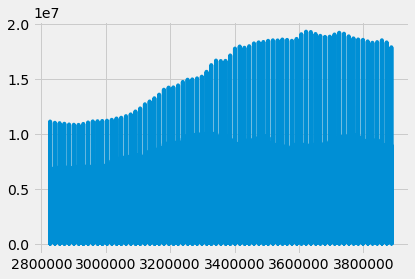

In [81]:
df6.Value.plot(kind='line');

In [53]:
df5['Date'] = pd.DatetimeIndex(df5.Date)
df5.fillna(method='ffill')

/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,RegionName,City,Metro,State,CountyName,SizeRank,Date,Value
0,60657,Chicago,Chicago,IL,Cook,1,1996-04-01,334200.0
1,75070,McKinney,Dallas-Fort Worth,TX,Collin,2,1996-04-01,235700.0
2,77494,Katy,Houston,TX,Harris,3,1996-04-01,210400.0
3,60614,Chicago,Chicago,IL,Cook,4,1996-04-01,498100.0
4,79936,El Paso,El Paso,TX,El Paso,5,1996-04-01,77300.0
5,77084,Houston,Houston,TX,Harris,6,1996-04-01,95000.0
6,10467,New York,New York,NY,Bronx,7,1996-04-01,152900.0
7,60640,Chicago,Chicago,IL,Cook,8,1996-04-01,216500.0
8,77449,Katy,Houston,TX,Harris,9,1996-04-01,95400.0
9,94109,San Francisco,San Francisco,CA,San Francisco,10,1996-04-01,766000.0


In [22]:
df['Date'] = pd.DatetimeIndex(df.Date)
df.fillna(method='ffill')

,RegionName,City,Metro,State,CountyName,SizeRank,Date,Value
0,60657,Chicago,Chicago,IL,Cook,1,1996-04-01,334200.0
1,75070,McKinney,Dallas-Fort Worth,TX,Collin,2,1996-04-01,235700.0
2,77494,Katy,Houston,TX,Harris,3,1996-04-01,210400.0
3,60614,Chicago,Chicago,IL,Cook,4,1996-04-01,498100.0
4,79936,El Paso,El Paso,TX,El Paso,5,1996-04-01,77300.0
5,77084,Houston,Houston,TX,Harris,6,1996-04-01,95000.0
6,10467,New York,New York,NY,Bronx,7,1996-04-01,152900.0
7,60640,Chicago,Chicago,IL,Cook,8,1996-04-01,216500.0
8,77449,Katy,Houston,TX,Harris,9,1996-04-01,95400.0
9,94109,San Francisco,San Francisco,CA,San Francisco,10,1996-04-01,766000.0


In [55]:
df_ff = df5[['RegionName', 'Date', 'Value']]
df_ff.set_index('Date')
df_ff.head()

,RegionName,Date,Value
0,60657,1996-04-01,334200.0
1,75070,1996-04-01,235700.0
2,77494,1996-04-01,210400.0
3,60614,1996-04-01,498100.0
4,79936,1996-04-01,77300.0


In [62]:
df_ff.shape

(701513, 3)

In [59]:
def subset_zipcode(zipcode, df):
    df_12 = df.copy()
    df_12 = df_12[df_12['RegionName'] == zipcode]
    df_12.drop(columns=['RegionName'], inplace=True)
    df_12.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)
    return df_12

In [84]:
def prophet_m(zipcode, df):   
    Model = proph(interval_width=0.95) 
    date_value_df = subset_zipcode(zipcode, df)
    Model.fit(date_value_df)
    future_dates = Model.make_future_dataframe(periods=12, freq='MS')
    forecast = Model.predict(future_dates).tail(1)
    
    
    ds = forecast['ds'].iloc[0]
    y_hat = forecast['yhat'].values[0]
    y_hat_lower = forecast['yhat_lower'].values[0]
    y_hat_upper = forecast['yhat_upper'].values[0]
    current_price = date_value_df['y'].iloc[-1]

    return (ds, y_hat, y_hat_lower, y_hat_upper, current_price)

In [90]:
zipcodes = df6['RegionName'].unique()
# zipcodes = [60657, 75070]
predictions = []
for zipcode in zipcodes:
    ds, y_hat, y_hat_lower, y_hat_upper, current_price = prophet_m(zipcode, df6) #(current $, predicted $, upper, lower)
    predictions.append({'zip': zipcode,
                        'ds': ds,
                        'y_hat': y_hat,
                        'y_hat_lower': y_hat_lower,
                        'y_hat_upper': y_hat_upper,
                        'current_price': current_price})


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [91]:
df = pd.DataFrame(predictions)

In [92]:
df['diff'] = df['y_hat'] - df['current_price'] 

In [93]:
df.sort_values(by='diff', ascending=False)

,current_price,ds,y_hat,y_hat_lower,y_hat_upper,zip,diff
56,1854300.0,2019-04-01,2.113064e+06,2.064652e+06,2.160554e+06,7030,258763.992588
74,1419100.0,2019-04-01,1.627992e+06,1.571867e+06,1.685322e+06,90034,208891.855820
30,1966900.0,2019-04-01,2.168947e+06,2.075317e+06,2.270130e+06,90046,202047.359744
131,1489900.0,2019-04-01,1.655067e+06,1.587448e+06,1.727028e+06,90066,165166.552627
66,930600.0,2019-04-01,1.076904e+06,1.044679e+06,1.107075e+06,98052,146304.295695
105,972100.0,2019-04-01,1.097831e+06,1.064165e+06,1.130039e+06,90026,125731.107235
12,1084600.0,2019-04-01,1.209017e+06,1.186053e+06,1.231959e+06,11375,124416.567377
20,11478300.0,2019-04-01,1.159653e+07,1.081655e+07,1.231551e+07,10011,118232.177609
63,1059700.0,2019-04-01,1.171711e+06,1.087570e+06,1.257453e+06,94501,112011.243250
83,2914100.0,2019-04-01,3.026038e+06,2.946145e+06,3.101665e+06,33139,111938.134864


In [95]:
df.to_csv('prediction.csv')

In [96]:
!ls

CONTRIBUTING.md                    mod_4_starter_notebook.ipynb
LICENSE.md                         prediction.csv
README.md                          prophet_model.ipynb
images                             starter_notebook
mod_4_starter_notebook-Copy1.ipynb zillow_data.csv


## prediction (data since 1996)

In [39]:
df_1 = df[['RegionName', 'Date', 'Value']]
df_1.set_index('Date')
df_1.head()

,RegionName,Date,Value
0,60657,1996-04-01,334200.0
1,75070,1996-04-01,235700.0
2,77494,1996-04-01,210400.0
3,60614,1996-04-01,498100.0
4,79936,1996-04-01,77300.0


In [43]:
def p1(zipcode, df_1=df_1):
    df_12 = df_1.copy()
    df_12 = df_12[df_12['RegionName'] == zipcode]
    df_12.drop(columns=['RegionName'], inplace=True)
    df_12.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)
    return df_12
    
def prophet_m(zipcode, df_1=df_1):   
    Model = proph(interval_width=0.95)
    Model.fit(p1(zipcode))
    future_dates = Model.make_future_dataframe(periods=12, freq='MS')
    forecast = Model.predict(future_dates)
    a = forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']]
#     Model.plot(forecast, uncertainty=True)
#     Model.plot_components(forecast)
    return a.tail(1)

In [ ]:
# zipcodes = df_1['RegionName'].unique()
# # zipcodes = [60657, 75070]
# predictions = []
# for zipcode in zipcodes:
#     prediction = prophet_m(zipcode, df_1) #(current $, predicted $, upper, lower)
#     predictions.append(prediction)

In [ ]:
predictions[1].tail(1)

In [58]:
predictions[0].tail(1)

,ds,yhat,yhat_lower,yhat_upper
276,2019-04-01,1.078485e+06,1039193.476,1.111255e+06


In [67]:
prophet_m(55414, df_1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
276,2019-04-01,283292.711405,274468.943741,290952.286657


In [ ]:
# df_1['predicted_value'] = df_1.apply(function_name)

In [32]:
df_1['RegionName'].astype('category')
df_1.head(1)

,RegionName,Date,Value
0,60657,1996-04-01,334200.0


In [27]:
df_1_w = df_1[df_1['RegionName']==55414]
len(df_1_w)
df_1_w

,RegionName,Date,Value
2276,55414,1996-04-01,82100.0
16999,55414,1996-05-01,82300.0
31722,55414,1996-06-01,82500.0
46445,55414,1996-07-01,82800.0
61168,55414,1996-08-01,83000.0
75891,55414,1996-09-01,83200.0
90614,55414,1996-10-01,83400.0
105337,55414,1996-11-01,83600.0
120060,55414,1996-12-01,83900.0
134783,55414,1997-01-01,84400.0


In [28]:
df_1_w.drop(columns=['RegionName'], inplace=True)
df_1_w.head(1)

,Date,Value
2276,1996-04-01,82100.0


In [29]:
df_1_w.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)
df_1_w.head(1)

,ds,y
2276,1996-04-01,82100.0


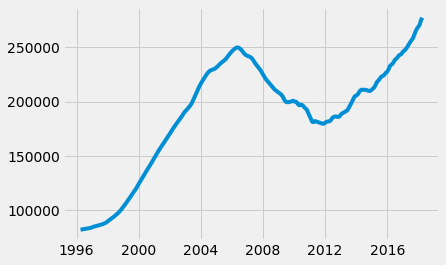

In [30]:
ax = plt.plot(df_1_w['ds'], df_1_w['y'])
plt.show();

In [31]:
Model_1 = proph(interval_width=0.95)

In [32]:
Model_1.fit(df_1_w)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future_dates_1 = Model_1.make_future_dataframe(periods=36, freq='MS')
future_dates_1.tail()

,ds
296,2020-12-01
297,2021-01-01
298,2021-02-01
299,2021-03-01
300,2021-04-01


In [34]:
forecast_1 = Model_1.predict(future_dates_1)
forecast_1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,80165.454012,75906.240216,84943.093471,80165.454012,80165.454012,334.970907,334.970907,334.970907,334.970907,334.970907,334.970907,0.0,0.0,0.0,80500.424919
1,1996-05-01,80617.889293,76355.459537,84786.431425,80617.889293,80617.889293,55.661160,55.661160,55.661160,55.661160,55.661160,55.661160,0.0,0.0,0.0,80673.550453
2,1996-06-01,81085.405751,76810.812287,85734.759447,81085.405751,81085.405751,193.378740,193.378740,193.378740,193.378740,193.378740,193.378740,0.0,0.0,0.0,81278.784490
3,1996-07-01,81537.841032,77371.622365,86173.835504,81537.841032,81537.841032,277.390019,277.390019,277.390019,277.390019,277.390019,277.390019,0.0,0.0,0.0,81815.231051
4,1996-08-01,82005.357489,77731.648885,86459.149745,82005.357489,82005.357489,97.475515,97.475515,97.475515,97.475515,97.475515,97.475515,0.0,0.0,0.0,82102.833004


In [35]:
forecast_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
281,2019-09-01,289446.111648,277349.995625,301159.627318
282,2019-10-01,290712.268545,277126.888803,304062.163643
283,2019-11-01,291958.856500,277205.747465,305775.377045
284,2019-12-01,293186.722969,278510.621662,307610.198875
285,2020-01-01,294337.419178,278262.006721,311465.836289
286,2020-02-01,295752.633446,277811.488880,313094.019633
287,2020-03-01,297158.213700,278067.947642,315339.336991
288,2020-04-01,298809.852621,279268.464208,318159.036312
289,2020-05-01,299821.057155,278858.279122,320944.578289
290,2020-06-01,301292.306158,278123.353798,324157.823975


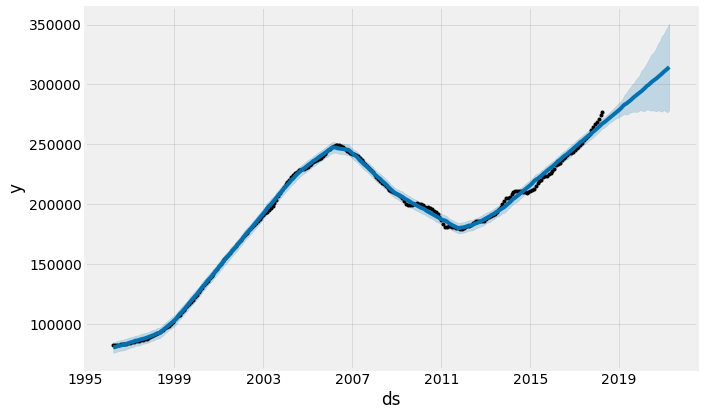

In [36]:
Model_1.plot(forecast_1, uncertainty=True)
plt.show()

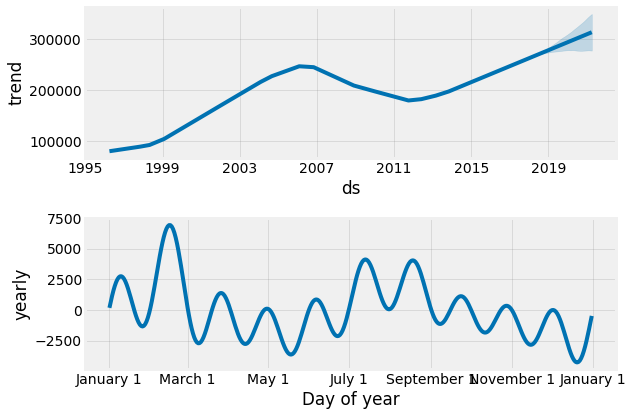

In [37]:
Model_1.plot_components(forecast_1)
plt.show()

## prediction (data since 2000)

In [ ]:
def p1(zipcode, df_1=df_1):
    df_12 = df_1.copy()
    df_12 = df_12[df_12['RegionName'] == zipcode]
    df_12.drop(columns=['RegionName'], inplace=True)
    df_12.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)
    return df_12
    
def prophet_m(zipcode, df_1=df_1):   
    Model = proph(interval_width=0.95)
    Model.fit(p1(zipcode))
    future_dates = Model.make_future_dataframe(periods=12, freq='MS')
    forecast = Model.predict(future_dates)
    a = forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']]
#     Model.plot(forecast, uncertainty=True)
#     Model.plot_components(forecast)
    return a.tail(1)

## prediction (data >2012)

In [ ]:
df_fiveyr = df[df['Date'] >= '2012-01']
df_fiveyr['Date'] = pd.DatetimeIndex(df_fiveyr.Date)
df_fiveyr.fillna(method='ffill')

In [ ]:
df_fiveyr1 = df_fiveyr[['RegionName', 'Date', 'Value']]
df_fiveyr1.set_index('Date')
df_fiveyr1.head(1)

In [ ]:
df_fiveyr_w = df_fiveyr1[df_fiveyr1['RegionName']==60657]
len(df_fiveyr_w)

In [ ]:
df_fiveyr_w.drop(columns=['RegionName'], inplace=True)

In [ ]:
df_fiveyr_w.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)
df_fiveyr_w.head()

In [ ]:
ax = plt.plot(df_fiveyr_w['ds'], df_fiveyr_w['y'])
plt.show();

In [ ]:
Model = proph(interval_width=0.95)

In [ ]:
Model.fit(df_fiveyr_w)

In [ ]:
future_dates = Model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

In [ ]:
forecast = Model.predict(future_dates)
forecast.head()

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
Model.plot(forecast, uncertainty=True)
plt.show()

In [ ]:
Model.plot_components(forecast)
plt.show()

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results